<a href="https://colab.research.google.com/github/krep3k/DataMining/blob/main/Clustering_datasets_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'data',
 'descr',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_file',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',


In [ ]:
wine = load_wine()
X = wine.data

In [ ]:
df = pd.DataFrame(data=X, columns=wine.feature_names)
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
kmeans.fit(X)
df['cluster_kmeans'] = kmeans.labels_

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

In [ ]:
pca_df = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2'])
pca_df['cluster_kmeans'] = df['cluster_kmeans']
pca_df['jenis_asli'] = wine.target

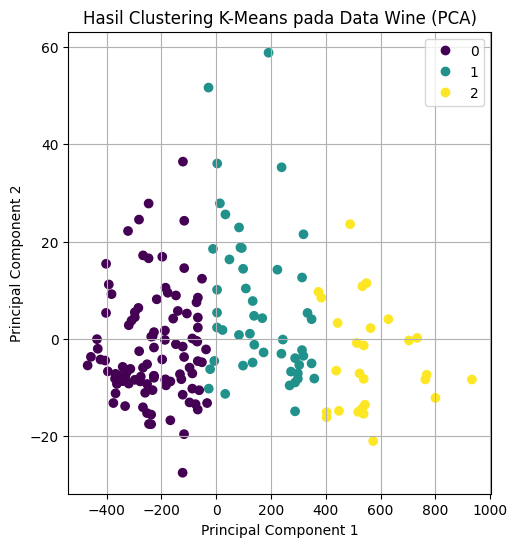

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
scatter = plt.scatter(pca_df['pc1'], pca_df['pc2'], c=pca_df['cluster_kmeans'], cmap='viridis')
plt.title('Hasil Clustering K-Means pada Data Wine (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2])
plt.grid(True)

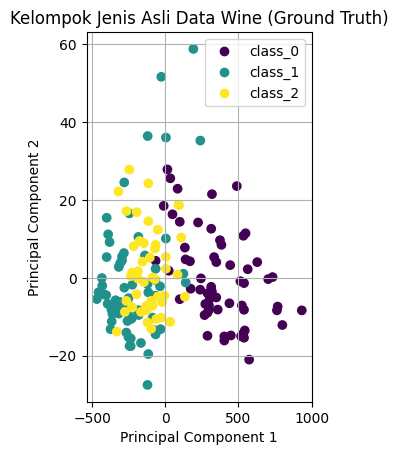

In [ ]:
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(pca_df['pc1'], pca_df['pc2'], c=pca_df['jenis_asli'], cmap='viridis')
plt.title('Kelompok Jenis Asli Data Wine (Ground Truth)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter2.legend_elements()[0], labels=list(wine.target_names))
plt.grid(True)

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>